In [47]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

In [48]:
total_data=pd.read_csv("../data/interim/eda_data.csv")

In [49]:
total_data.columns

Index(['date_occ', 'time_occ', 'area_name', 'rpt_dist_no', 'crm_cd_desc',
       'mocodes', 'vict_age', 'vict_sex', 'vict_descent', 'premis_desc',
       'weapon_desc', 'status_desc', 'location', 'lat', 'lon'],
      dtype='object')

In [50]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 433936 entries, 0 to 433935
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date_occ      433936 non-null  object 
 1   time_occ      433936 non-null  int64  
 2   area_name     433936 non-null  object 
 3   rpt_dist_no   433936 non-null  int64  
 4   crm_cd_desc   433936 non-null  object 
 5   mocodes       374863 non-null  object 
 6   vict_age      433936 non-null  int64  
 7   vict_sex      377464 non-null  object 
 8   vict_descent  377461 non-null  object 
 9   premis_desc   433651 non-null  object 
 10  weapon_desc   154873 non-null  object 
 11  status_desc   433936 non-null  object 
 12  location      433936 non-null  object 
 13  lat           433936 non-null  float64
 14  lon           433936 non-null  float64
dtypes: float64(2), int64(3), object(10)
memory usage: 49.7+ MB


In [51]:
total_data.describe()

,time_occ,rpt_dist_no,vict_age,lat,lon
count,433936.000000,433936.000000,433936.000000,433936.000000,433936.000000
mean,1342.261801,807.326440,29.243091,33.978735,-118.063061
std,653.305824,582.410313,21.737410,1.613498,5.594830
min,1.000000,101.000000,0.000000,0.000000,-118.667600
25%,900.000000,327.000000,0.000000,34.023400,-118.376600
50%,1427.000000,644.000000,30.000000,34.051200,-118.296000
75%,1900.000000,1203.000000,44.000000,34.098100,-118.260900
max,2359.000000,2198.000000,99.000000,34.328900,0.000000


In [52]:
duplicate_count = total_data.duplicated().sum()
duplicate_count

0

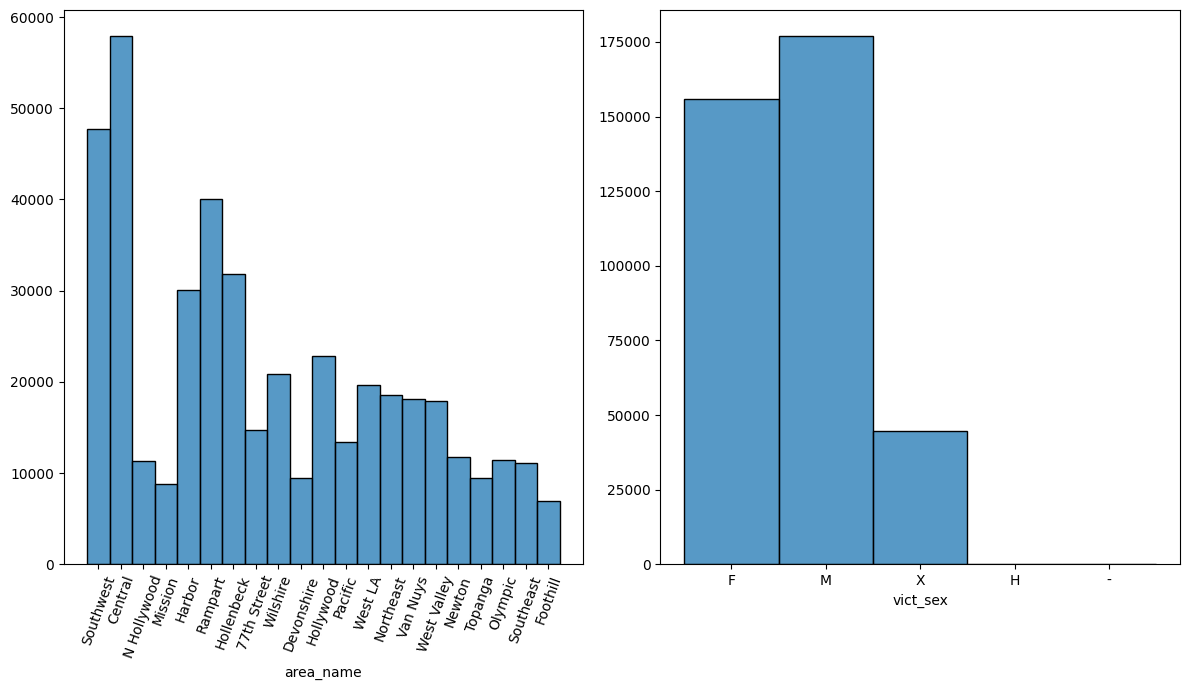

In [53]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(1,2, figsize = (12, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "area_name").set(ylabel = None) 
axis[0].tick_params(axis='x', rotation=70)
#sns.boxplot(ax = axis[1, 0], data = total_data, x = "area_name")#.set(xlabel = None)
#axis[1,0].tick_params(axis='x', rotation=70)
sns.histplot(ax = axis[1], data = total_data, x = "vict_sex").set(ylabel = None)
#sns.boxplot(ax = axis[1, 1], data = total_data, x = "vict_sex")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [54]:
import datetime
total_data['date_occ'] = pd.to_datetime(total_data['date_occ']).dt.date
total_data["date_occ"] = pd.to_datetime(total_data["date_occ"])

In [55]:
valores_nulos_sexo = total_data['vict_sex'].isnull().sum()
valores_nulos_sexo

56472

In [56]:
total_data['vict_sex'].value_counts()

vict_sex
M    176863
F    155883
X     44679
H        38
-         1
Name: count, dtype: int64

In [57]:
total_data=total_data.loc[(total_data['vict_sex']=='M')|(total_data['vict_sex']=='F')|(total_data['vict_sex']=='X')|(total_data['vict_sex'].isnull())]

In [58]:
total_data['vict_sex'].value_counts()

vict_sex
M    176863
F    155883
X     44679
Name: count, dtype: int64

In [59]:
valores_nulos_sexo

56472

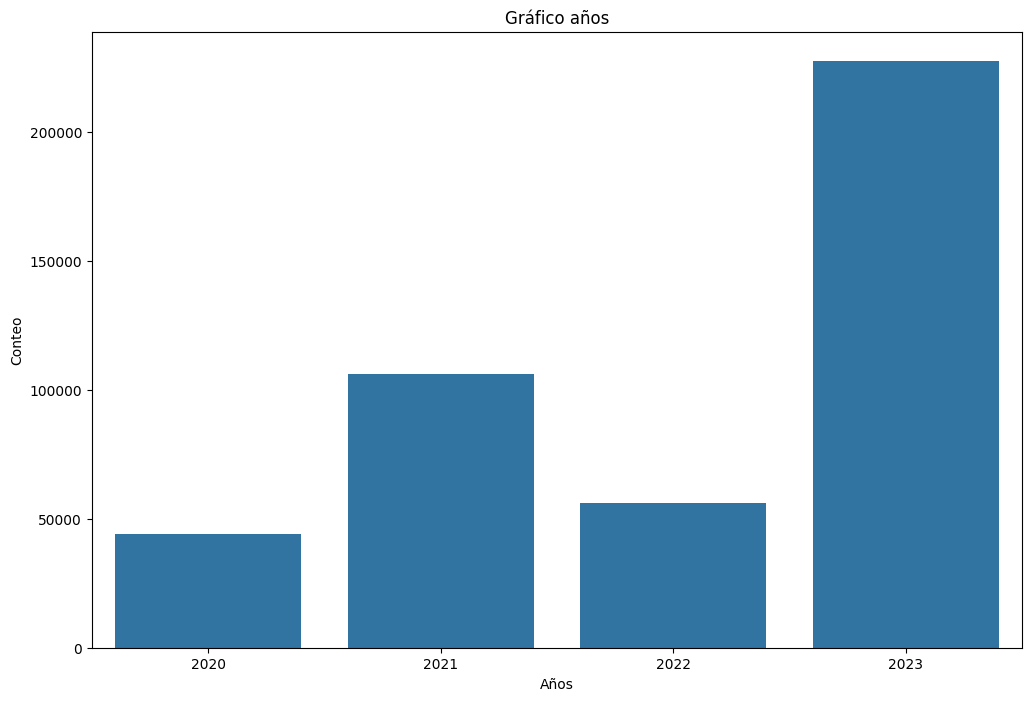

In [60]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=total_data["date_occ"].dt.year.value_counts().index, 
                 y=total_data["date_occ"].dt.year.value_counts())

# Configurar etiquetas y título
plt.xlabel('Años')
plt.ylabel('Conteo')
plt.title('Gráfico años')

# Mostrar el gráfico
plt.show()

In [61]:
delitos=total_data.value_counts("crm_cd_desc")[0:20]
delitos=pd.DataFrame(delitos)
delitos.head(5)

,count
crm_cd_desc,
VEHICLE - STOLEN,45699
BATTERY - SIMPLE ASSAULT,37054
BURGLARY FROM VEHICLE,28201
"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)",27128
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25645


C:\Users\user\AppData\Local\Temp\ipykernel_9876\3918333898.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


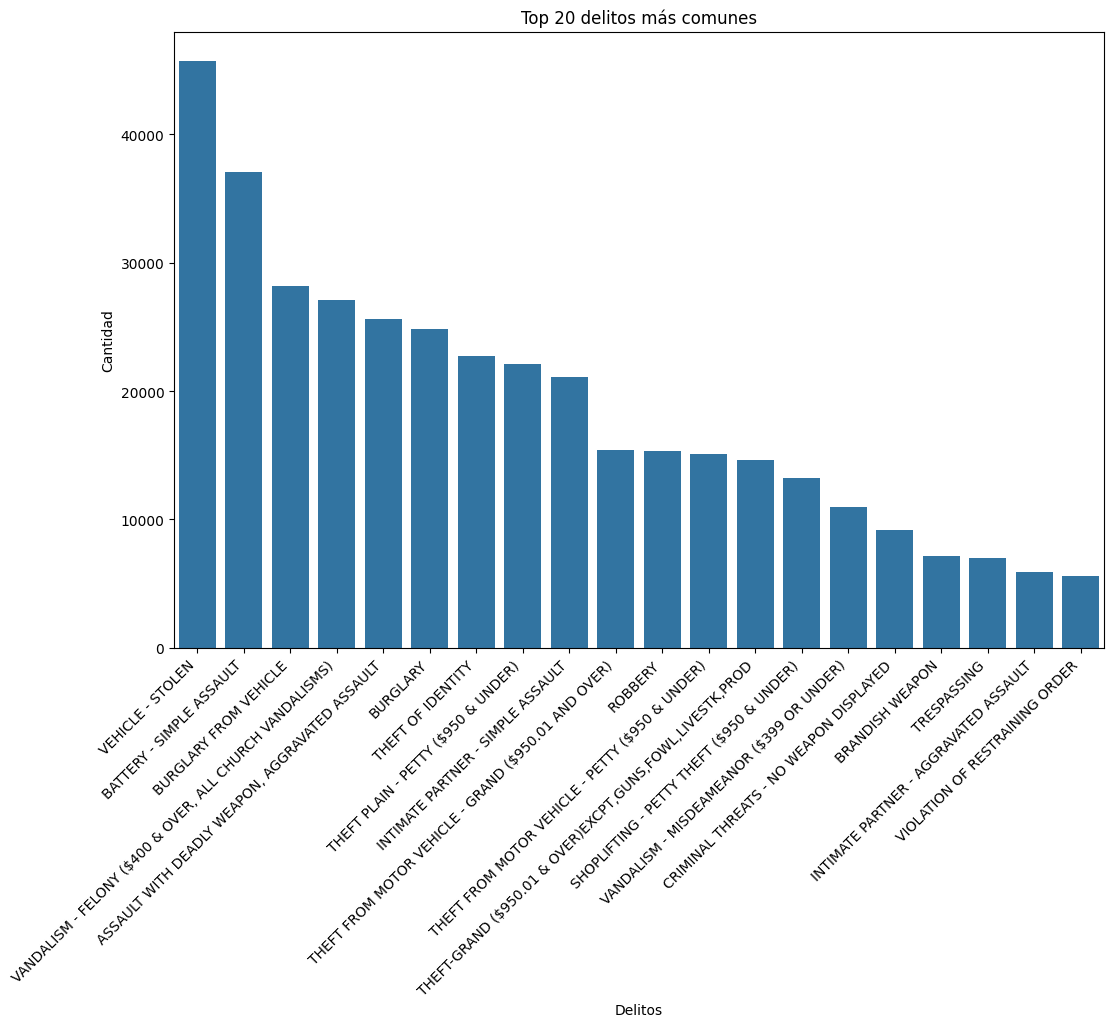

In [62]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=delitos.index, y=delitos['count'], data=delitos)
#ax.set_xticks([])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


# Configurar etiquetas y título
plt.xlabel('Delitos')
plt.ylabel('Cantidad')
plt.title('Top 20 delitos más comunes')

# Mostrar el gráfico
plt.show()

In [63]:
hours=total_data.value_counts("time_occ")#[0:20]
hours=pd.DataFrame(hours)
hours.head(5)

,count
time_occ,
1200,13222
1800,11334
1700,10576
2000,10424
1900,9730


In [64]:
hours=hours.sort_index()

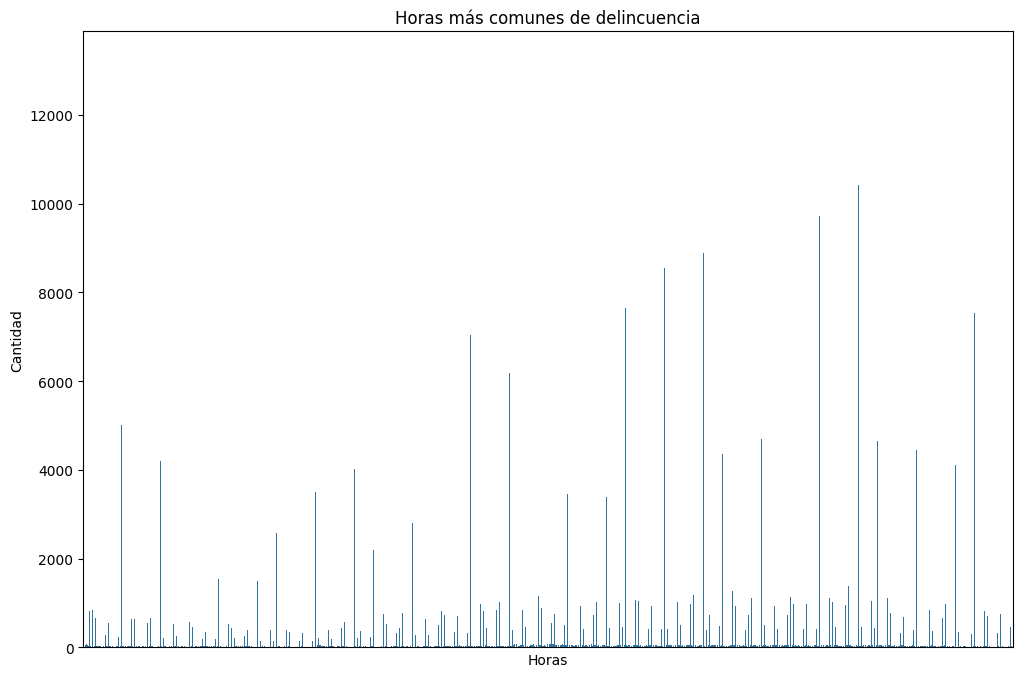

In [65]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=hours.index, y=hours['count'], data=hours)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xticks([])
# Configurar etiquetas y título
plt.xlabel('Horas')
plt.ylabel('Cantidad')
plt.title('Horas más comunes de delincuencia')

# Mostrar el gráfico
plt.show()

In [66]:
rpt_codes=total_data.value_counts("rpt_dist_no")[0:20]
rpt_codes.head(5)

rpt_dist_no
162    4553
182    4015
111    3294
152    2607
153    2528
Name: count, dtype: int64

In [67]:
rpt_codes=pd.DataFrame(rpt_codes)
rpt_codes.head(5)

,count
rpt_dist_no,
162,4553
182,4015
111,3294
152,2607
153,2528


C:\Users\user\AppData\Local\Temp\ipykernel_9876\3524340919.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


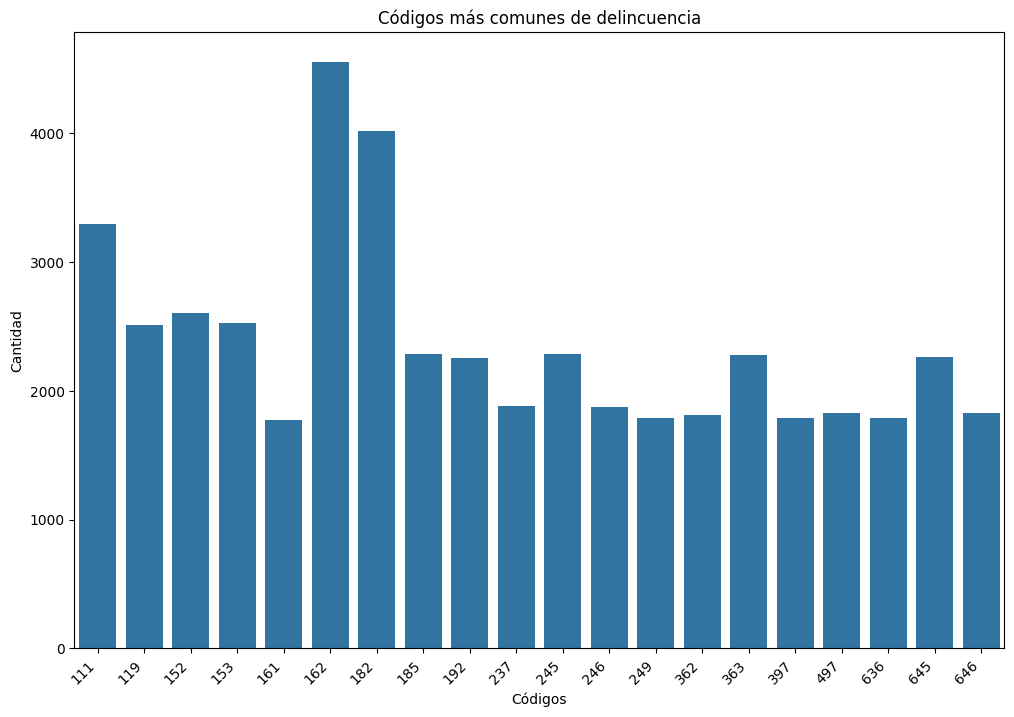

In [68]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=rpt_codes.index, y=rpt_codes['count'], data=rpt_codes)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
#ax.set_xticks([])
# Configurar etiquetas y título
plt.xlabel('Códigos')
plt.ylabel('Cantidad')
plt.title('Códigos más comunes de delincuencia')

# Mostrar el gráfico
plt.show()

<Axes: xlabel='vict_age'>

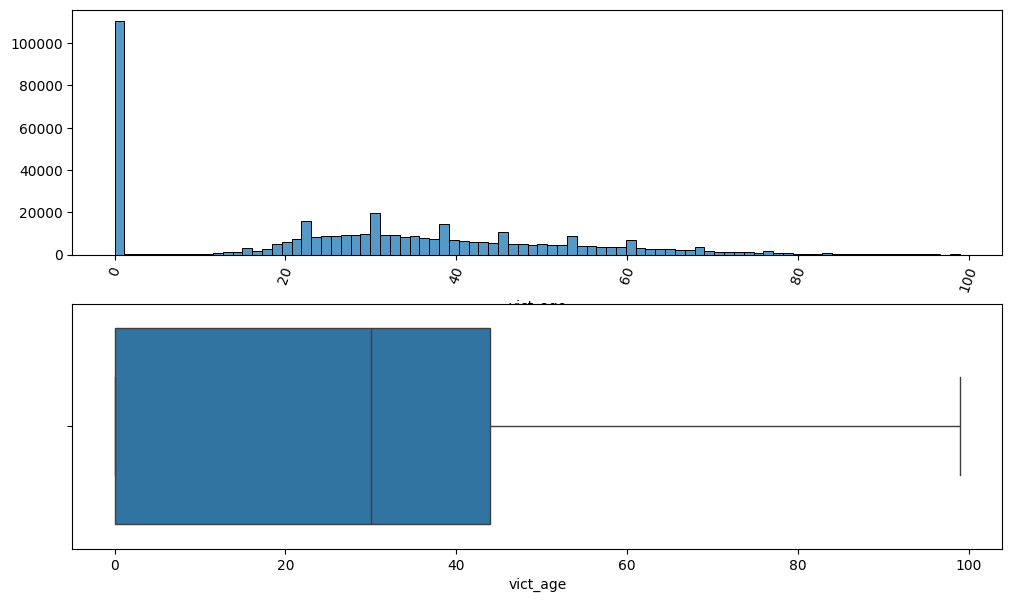

In [69]:
fig, axis = plt.subplots(2,1, figsize = (12, 7))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "vict_age").set(ylabel = None) 
axis[0].tick_params(axis='x', rotation=70)
sns.boxplot(ax = axis[1], data = total_data, x = "vict_age")#.set(xlabel = None)

<Axes: xlabel='date_occ'>

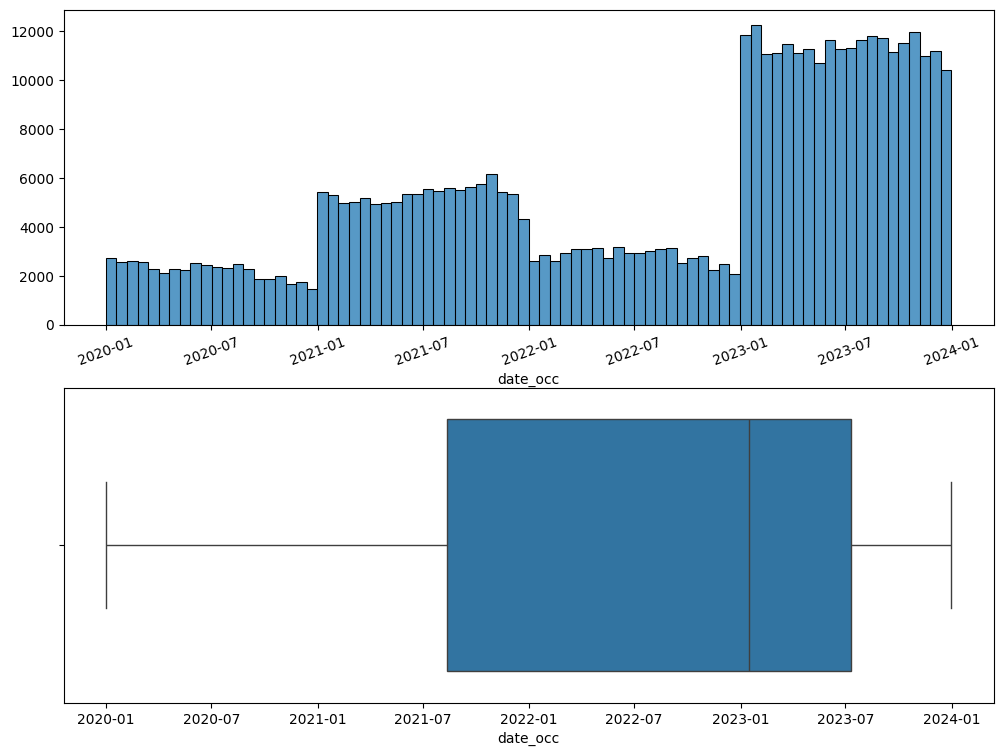

In [70]:
fig, axis = plt.subplots(2,1, figsize = (12, 9))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = total_data, x = "date_occ").set(ylabel = None) 
axis[0].tick_params(axis='x', rotation=20)
sns.boxplot(ax = axis[1], data = total_data, x = "date_occ")#.set(xlabel = None)

In [71]:
descent=total_data.value_counts("vict_descent")[0:20]
descent=pd.DataFrame(descent)
descent.head()

,count
vict_descent,
H,134284
W,82134
B,62354
X,48055
O,32125


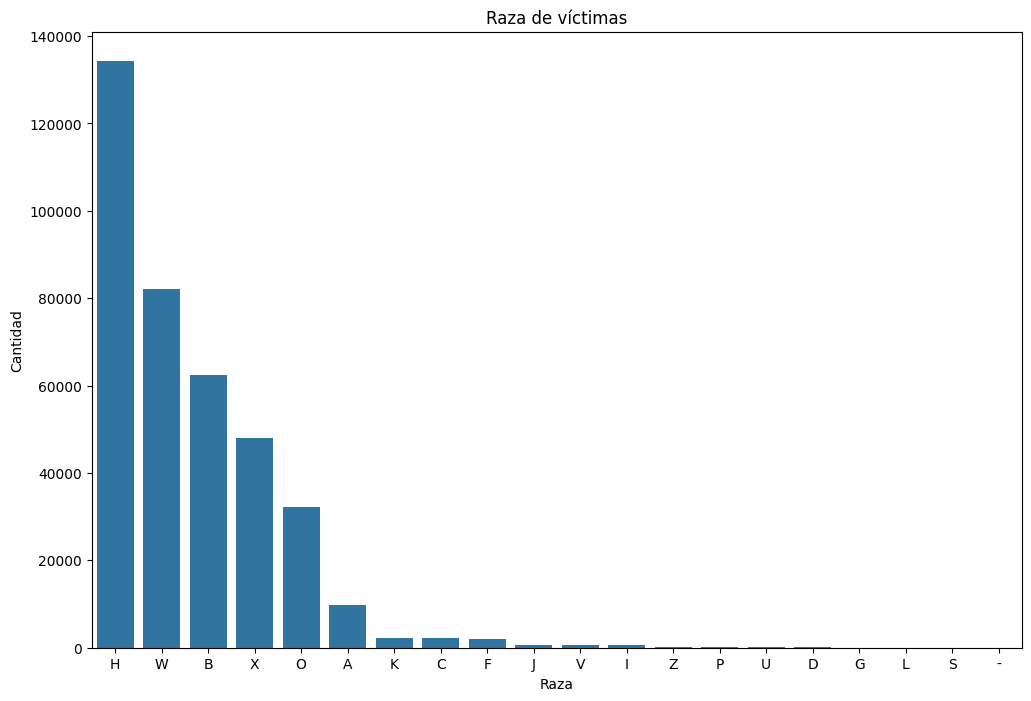

In [72]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=descent.index, y=descent['count'], data=descent)

# Configurar etiquetas y título
plt.xlabel('Raza')
plt.ylabel('Cantidad')
plt.title('Raza de víctimas')

# Mostrar el gráfico
plt.show()

In [73]:
valores_nulos_raza=total_data['vict_descent'].isnull().sum()
valores_nulos_raza

56475

In [74]:
total_data = total_data[total_data['vict_descent'].isin(total_data['vict_descent'].unique()[:-1]) | total_data['vict_sex'].isnull()]

total_data['vict_descent'].value_counts()

vict_descent
H    134284
W     82134
B     62354
X     48055
O     32125
A      9792
K      2214
C      2175
F      1912
J       690
V       564
I       515
Z       248
P       133
U        82
D        54
G        34
L        33
S        23
Name: count, dtype: int64

In [75]:
weapon_desc=total_data.value_counts("weapon_desc")[0:20]
weapon_desc=pd.DataFrame(weapon_desc)
weapon_desc.head(10)

,count
weapon_desc,
"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",82486
UNKNOWN WEAPON/OTHER WEAPON,17572
VERBAL THREAT,11286
HAND GUN,9745
KNIFE WITH BLADE 6INCHES OR LESS,3371
OTHER KNIFE,3170
SEMI-AUTOMATIC PISTOL,2976
UNKNOWN FIREARM,2906
MACE/PEPPER SPRAY,1936


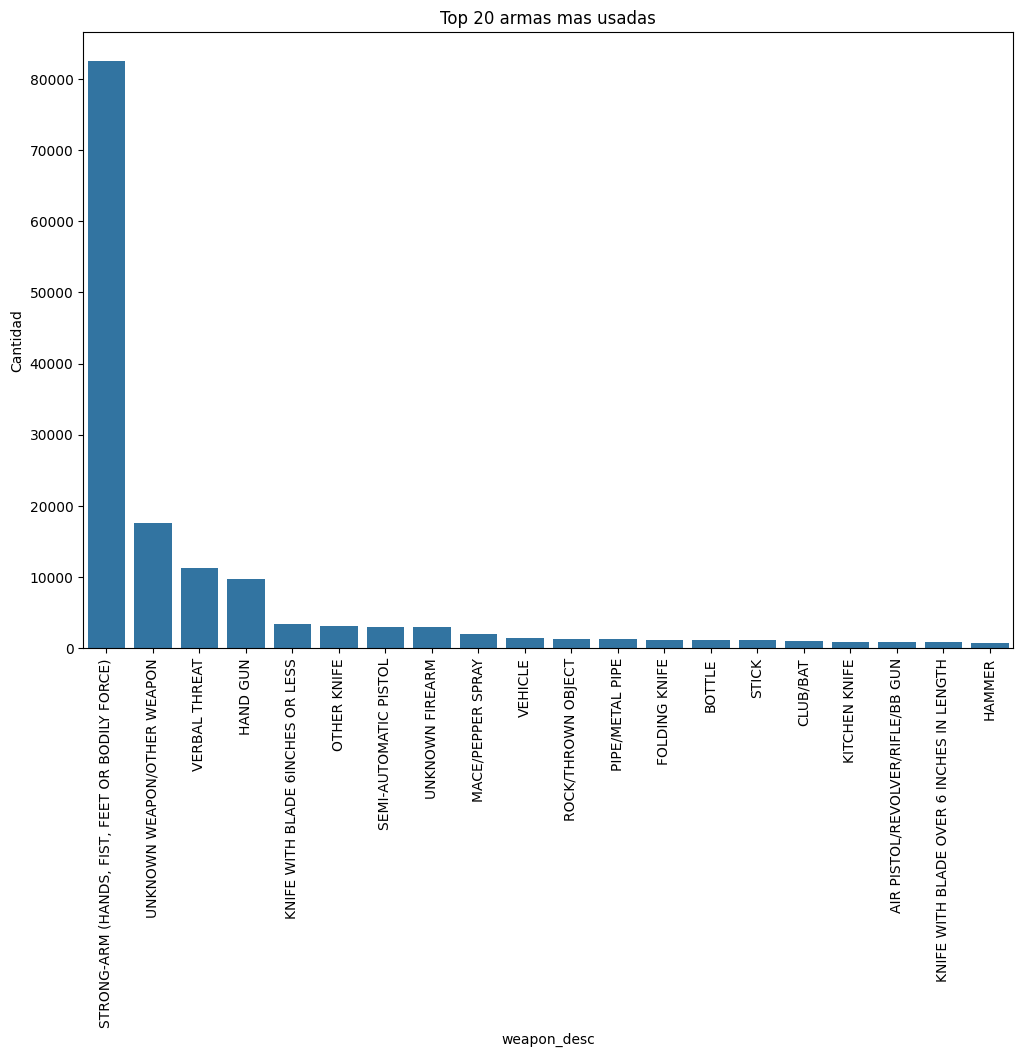

In [76]:
plt.figure(figsize=(12, 8))

# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=weapon_desc.index, y=weapon_desc['count'], data=weapon_desc)
plt.tick_params(axis = "x", labelrotation=90)

# Configurar etiquetas y título
plt.xlabel('weapon_desc')
plt.ylabel('Cantidad')
plt.title('Top 20 armas mas usadas')

# Mostrar el gráfico
plt.show()

In [77]:
is_weapon=total_data["weapon_desc"].isnull().value_counts()
is_weapon#.value_counts()

weapon_desc
True     279036
False    154860
Name: count, dtype: int64

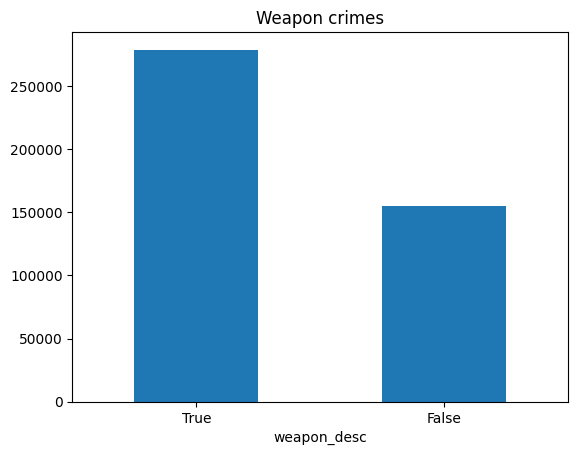

In [78]:
is_weapon.plot(kind='bar',rot=0, title='Weapon crimes')
plt.show()

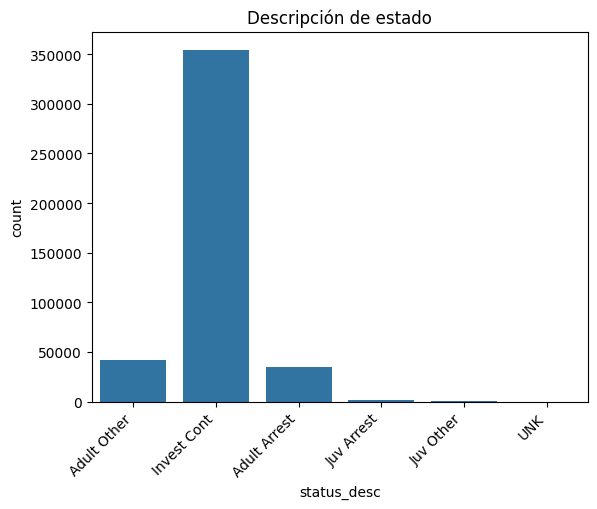

In [79]:
sns.countplot(x='status_desc', data=total_data)
plt.xticks(rotation=45, ha='right')
plt.title('Descripción de estado')
plt.show()

In [80]:
location = total_data.value_counts("location")[0:50]
location = pd.DataFrame(location)
location.head()

,count
location,
800 N ALAMEDA ST,1623
7TH,1247
6TH ST,1228
7TH ST,1178
6TH,1175


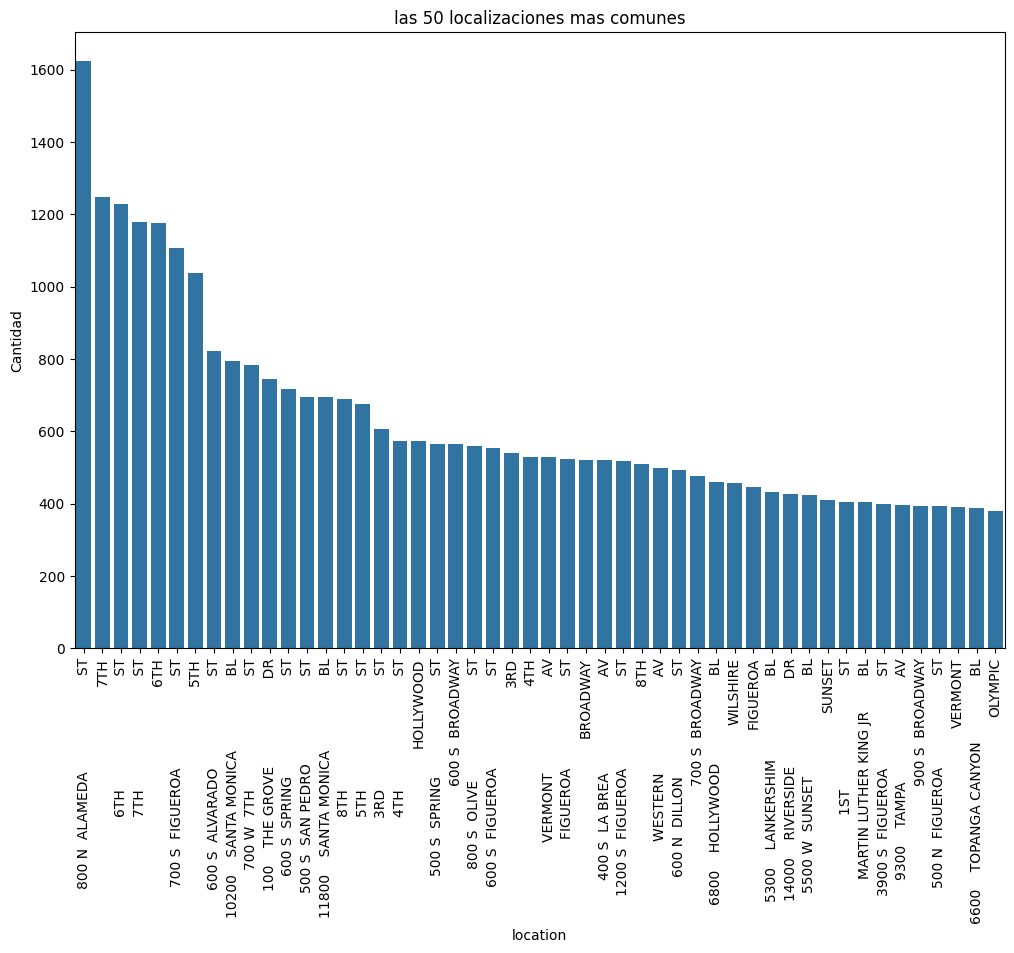

In [81]:
plt.figure(figsize=(12, 8))
# Crear el histograma utilizando Seaborn
ax=sns.barplot(x=location.index, y=location['count'], data=location)
# Configurar etiquetas y título
plt.tick_params(axis = "x", labelrotation=90)
plt.xlabel('location')
plt.ylabel('Cantidad')
plt.title("las 50 localizaciones mas comunes")
# Mostrar el gráfico
plt.show()

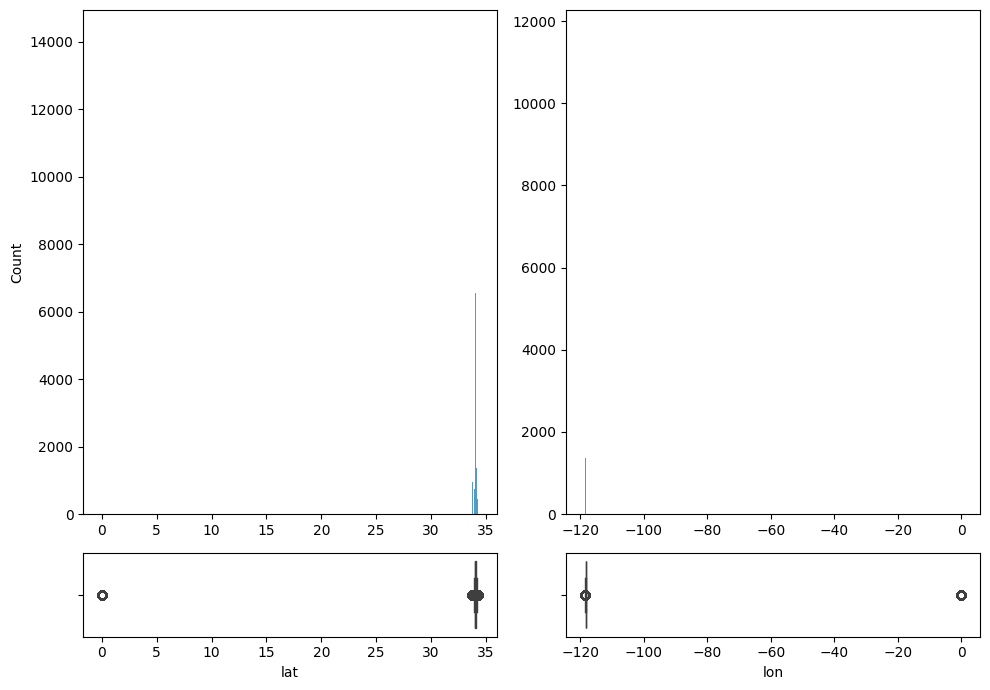

In [82]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "lat").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "lat")
sns.histplot(ax = axis[0, 1], data = total_data, x = "lon").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "lon")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [83]:
len(total_data.loc[(total_data["lat"] == 0) & (total_data["lon"] == 0)])

972

In [84]:
total_data=total_data.loc[(total_data['lat'] > 0) & (total_data['lat'] > 0)]

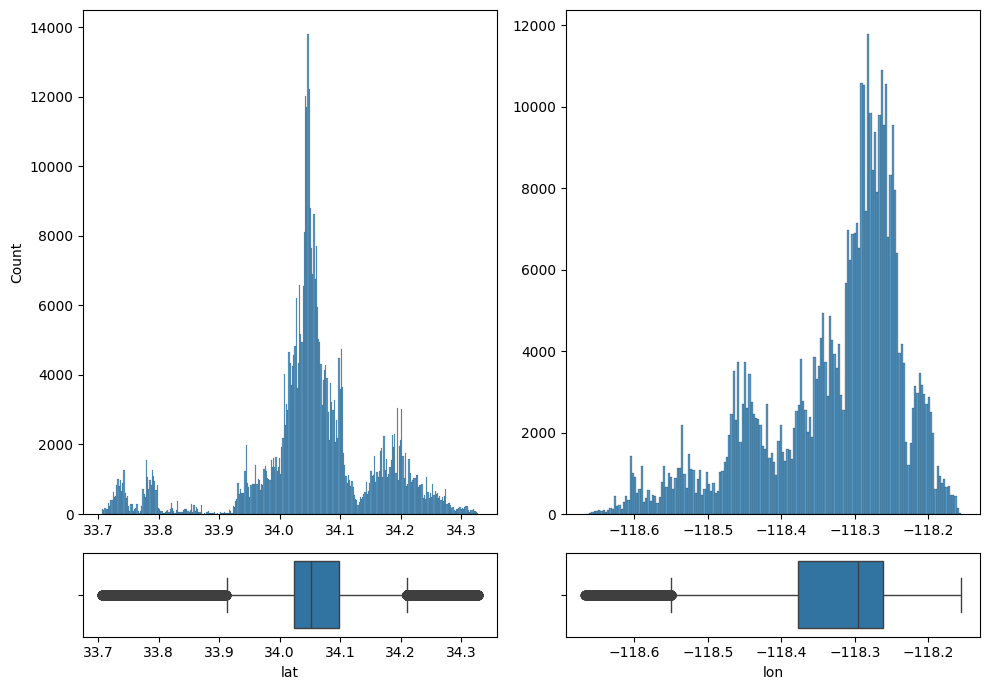

In [85]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "lat").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "lat")
sns.histplot(ax = axis[0, 1], data = total_data, x = "lon").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "lon")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

In [86]:
total_data.dropna(subset=['mocodes'],inplace=True)

In [87]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373877 entries, 0 to 433935
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      373877 non-null  datetime64[ns]
 1   time_occ      373877 non-null  int64         
 2   area_name     373877 non-null  object        
 3   rpt_dist_no   373877 non-null  int64         
 4   crm_cd_desc   373877 non-null  object        
 5   mocodes       373877 non-null  object        
 6   vict_age      373877 non-null  int64         
 7   vict_sex      373757 non-null  object        
 8   vict_descent  373757 non-null  object        
 9   premis_desc   373597 non-null  object        
 10  weapon_desc   154167 non-null  object        
 11  status_desc   373877 non-null  object        
 12  location      373877 non-null  object        
 13  lat           373877 non-null  float64       
 14  lon           373877 non-null  float64       
dtypes: datetime64[ns](1), 

In [88]:
total_data['mocodes']=total_data['mocodes'].str.split(" ")

In [89]:
frecuencias = total_data['mocodes'].apply(pd.Series).stack().value_counts()
frecuencias=frecuencias[0:20]

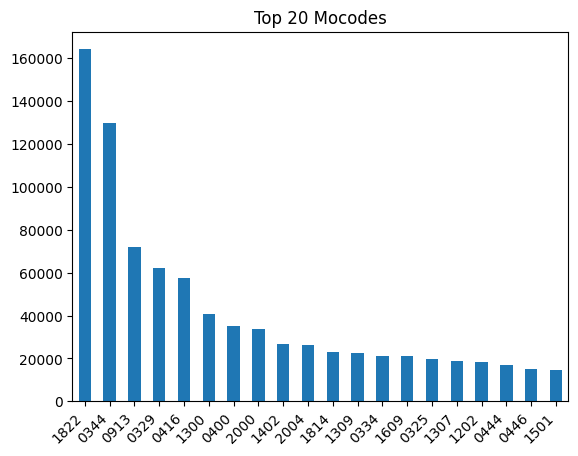

In [90]:
frecuencias.plot(kind='bar',rot=0, title='Top 20 Mocodes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [91]:
total_data['weekday']=total_data["date_occ"].apply(lambda x:x.strftime("%A"))
total_data['month']=total_data["date_occ"].apply(lambda x:x.strftime("%B"))

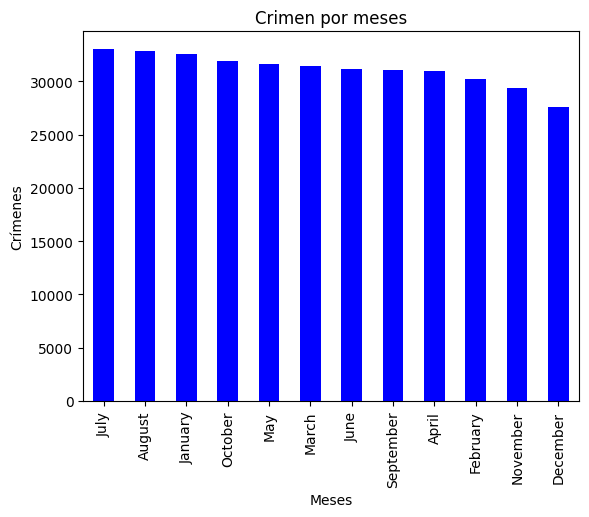

In [92]:
meses=total_data['month'].value_counts()
meses.plot(kind='bar', color='blue')
plt.xlabel('Meses')
plt.ylabel('Crímenes')
plt.title('Crimen por meses')
plt.show()

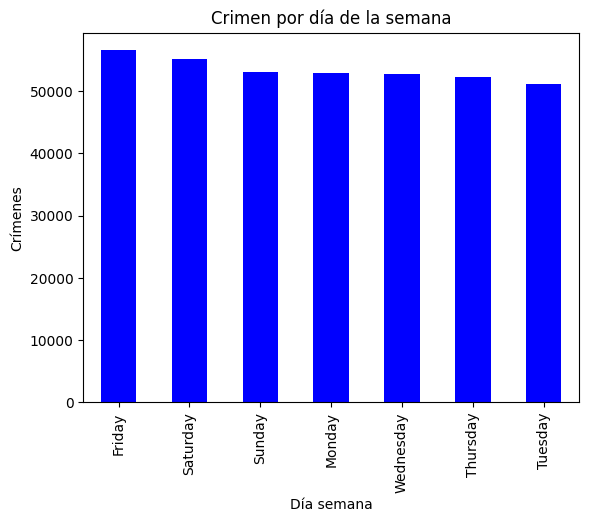

In [93]:
meses=total_data['weekday'].value_counts()
meses.plot(kind='bar', color='blue')
plt.xlabel('Día semana')
plt.ylabel('Crímenes')
plt.title('Crimen por día de la semana')
plt.show()

# Análisis multivariante

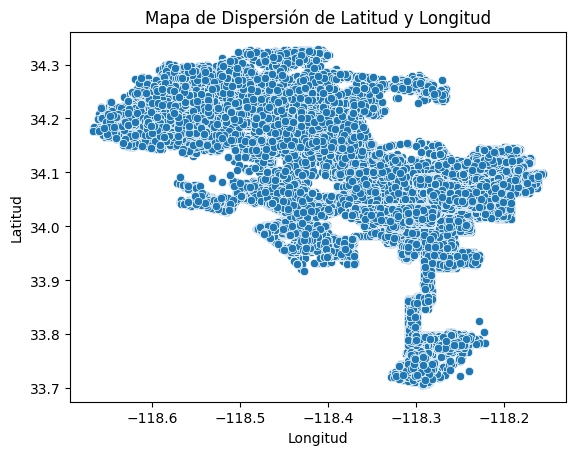

In [94]:
sns.scatterplot(x=total_data['lon'], y=total_data['lat'], data=total_data)
plt.title('Mapa de Dispersión de Latitud y Longitud')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

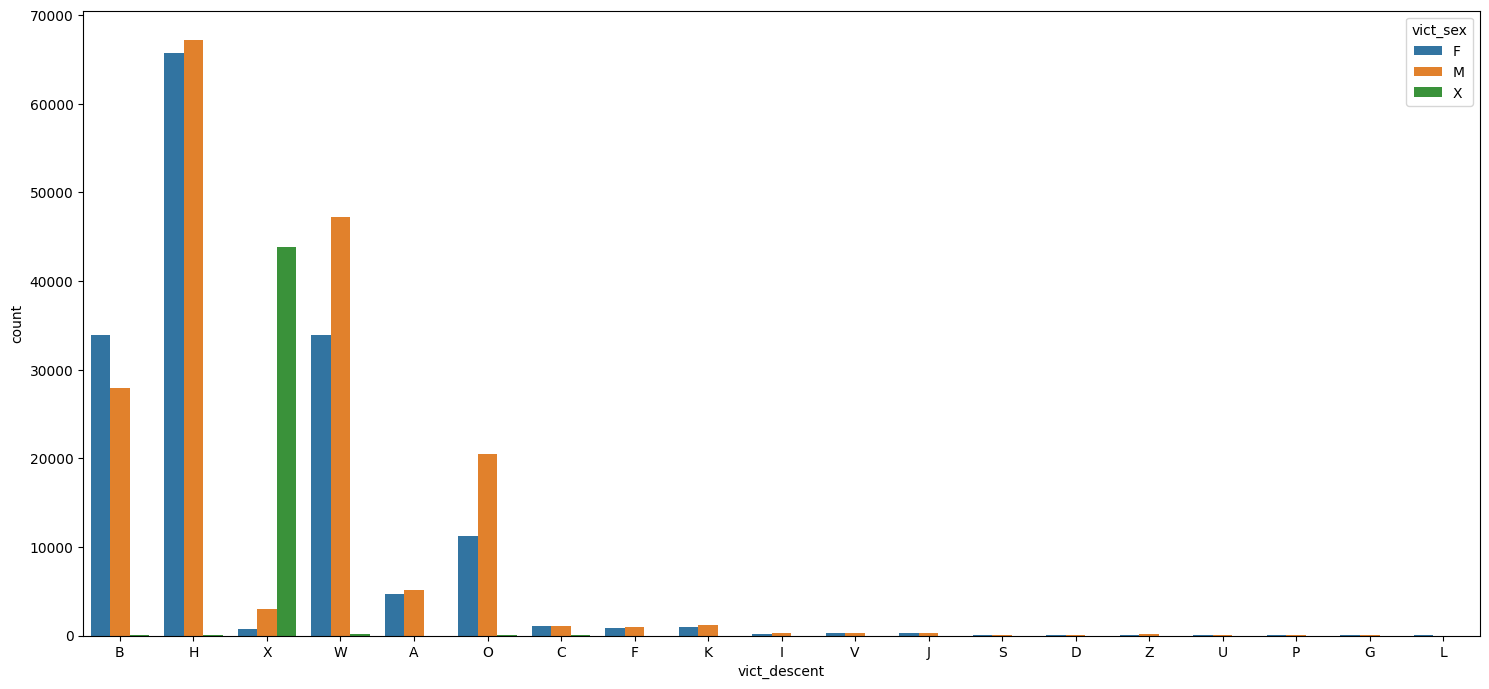

In [95]:
fig, axis = plt.subplots(1, figsize = (15, 7))

sns.countplot( data = total_data, x = "vict_descent", hue = "vict_sex")

plt.tight_layout()
#fig.delaxes(axis[1, 2])

plt.show()

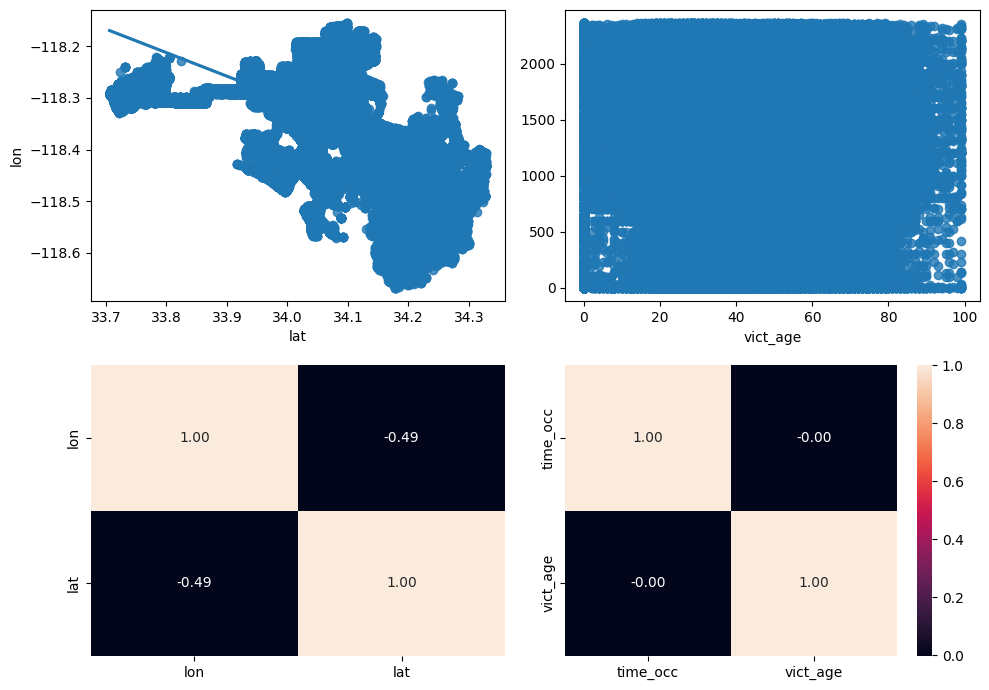

In [96]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "lat", y = "lon")
sns.heatmap(total_data[["lon", "lat"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "vict_age", y = "time_occ").set(ylabel=None)
sns.heatmap(total_data[["time_occ", "vict_age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

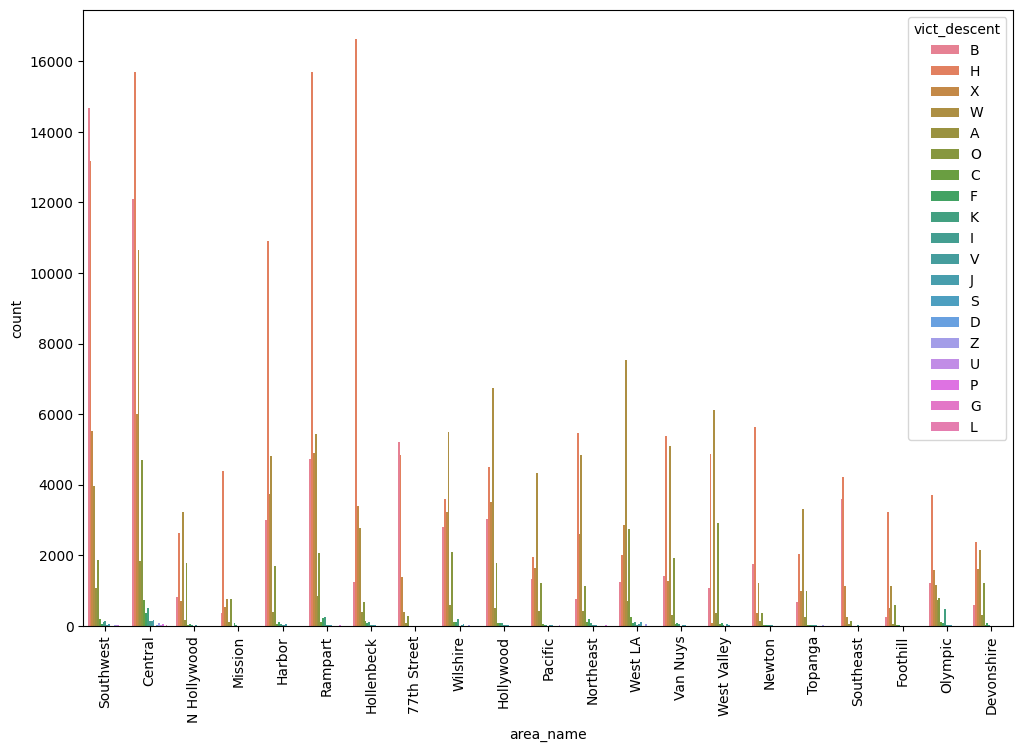

In [97]:
plt.figure(figsize=(12, 8))
# Create a multiple scatter diagram
sns.countplot( data = total_data, x = "area_name", hue = "vict_descent")
plt.tick_params(axis = "x", labelrotation=90)
# Show the plot
plt.show()

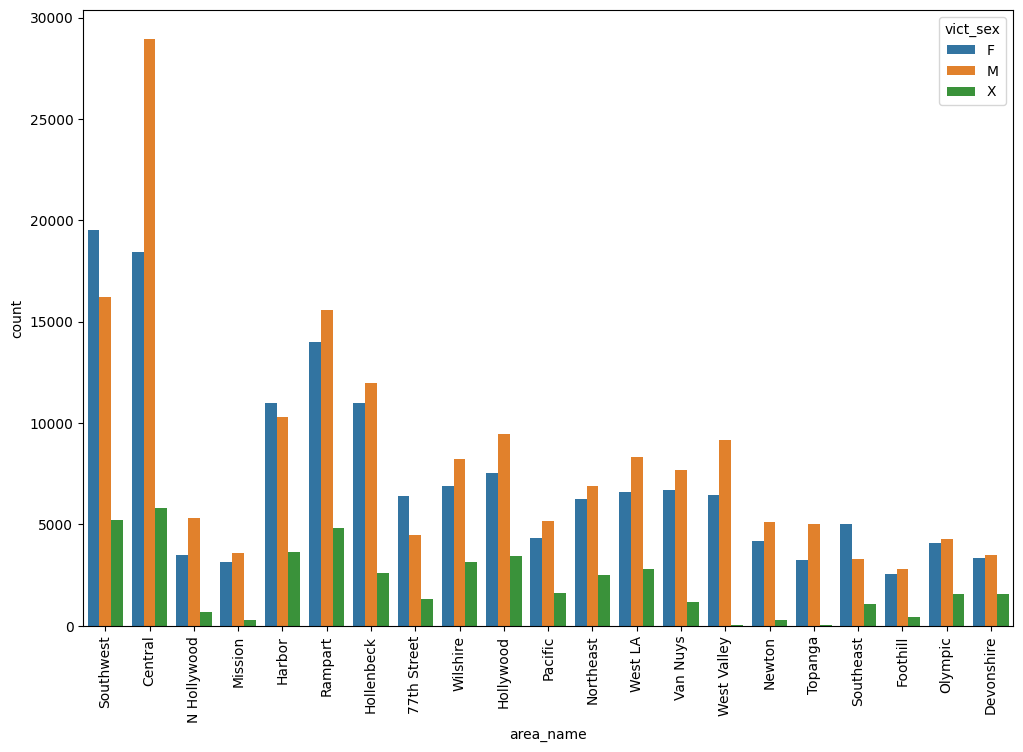

In [98]:
plt.figure(figsize=(12, 8))
# Create a multiple scatter diagram
sns.countplot( data = total_data, x = "area_name", hue = "vict_sex")
plt.tick_params(axis = "x", labelrotation=90)
# Show the plot
plt.show()

# Feature engineering

In [99]:
total_data["weapon_desc"].fillna("No weapon registered", inplace = True)
total_data["weapon_desc"].head()

0    STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)
1                       UNKNOWN WEAPON/OTHER WEAPON
2                              No weapon registered
3                              No weapon registered
4                              No weapon registered
Name: weapon_desc, dtype: object

In [100]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373877 entries, 0 to 433935
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      373877 non-null  datetime64[ns]
 1   time_occ      373877 non-null  int64         
 2   area_name     373877 non-null  object        
 3   rpt_dist_no   373877 non-null  int64         
 4   crm_cd_desc   373877 non-null  object        
 5   mocodes       373877 non-null  object        
 6   vict_age      373877 non-null  int64         
 7   vict_sex      373757 non-null  object        
 8   vict_descent  373757 non-null  object        
 9   premis_desc   373597 non-null  object        
 10  weapon_desc   373877 non-null  object        
 11  status_desc   373877 non-null  object        
 12  location      373877 non-null  object        
 13  lat           373877 non-null  float64       
 14  lon           373877 non-null  float64       
 15  weekday       373877 n

In [101]:
total_data["vict_sex"].fillna("X", inplace = True)
total_data["vict_descent"].fillna("X", inplace = True)

In [102]:
total_data=total_data.dropna(subset=['premis_desc'])
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373597 entries, 0 to 433935
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      373597 non-null  datetime64[ns]
 1   time_occ      373597 non-null  int64         
 2   area_name     373597 non-null  object        
 3   rpt_dist_no   373597 non-null  int64         
 4   crm_cd_desc   373597 non-null  object        
 5   mocodes       373597 non-null  object        
 6   vict_age      373597 non-null  int64         
 7   vict_sex      373597 non-null  object        
 8   vict_descent  373597 non-null  object        
 9   premis_desc   373597 non-null  object        
 10  weapon_desc   373597 non-null  object        
 11  status_desc   373597 non-null  object        
 12  location      373597 non-null  object        
 13  lat           373597 non-null  float64       
 14  lon           373597 non-null  float64       
 15  weekday       373597 n

In [103]:
total_data=total_data.loc[total_data['vict_age']>0]
total_data = total_data.reset_index()

In [104]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320504 entries, 0 to 320503
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   index         320504 non-null  int64         
 1   date_occ      320504 non-null  datetime64[ns]
 2   time_occ      320504 non-null  int64         
 3   area_name     320504 non-null  object        
 4   rpt_dist_no   320504 non-null  int64         
 5   crm_cd_desc   320504 non-null  object        
 6   mocodes       320504 non-null  object        
 7   vict_age      320504 non-null  int64         
 8   vict_sex      320504 non-null  object        
 9   vict_descent  320504 non-null  object        
 10  premis_desc   320504 non-null  object        
 11  weapon_desc   320504 non-null  object        
 12  status_desc   320504 non-null  object        
 13  location      320504 non-null  object        
 14  lat           320504 non-null  float64       
 15  lon           320

In [105]:
codigos=pd.read_csv("../data/raw/mo_codes_data.csv")    

In [106]:
codigos["REV: 07/19"]
codigos['code']=codigos["REV: 07/19"].str[:4]
codigos['modus_operandi']=codigos["REV: 07/19"].str[4:]
    

In [107]:
codigos.head()

,REV: 07/19,code,modus_operandi
0,0100 Suspect Impersonate,0100,Suspect Impersonate
1,0101 Aid victim,0101,Aid victim
2,0102 Blind,0102,Blind
3,0103 Physically disabled,0103,Physically disabled
4,0104 Customer,0104,Customer


In [108]:
codigos.drop(['REV: 07/19'],axis=1,inplace=True)
codigos.head()

,code,modus_operandi
0,0100,Suspect Impersonate
1,0101,Aid victim
2,0102,Blind
3,0103,Physically disabled
4,0104,Customer


In [109]:
codigos = codigos[~codigos['code'].str.contains(r'[a-zA-Z]')]

In [110]:
codigos.head()

,code,modus_operandi
0,0100,Suspect Impersonate
1,0101,Aid victim
2,0102,Blind
3,0103,Physically disabled
4,0104,Customer


In [111]:
total_data['mocodes'].fillna("0", inplace=True)

In [112]:
count=0
for i in total_data["mocodes"]:
    if type(i)==float:
        count+=1
        print(i)
count

0

In [128]:
total_data['mocodes'].head()

0                [0444, 0913]
1          [0416, 1414, 1822]
2                [0329, 1402]
3                      [0329]
4    [0413, 1262, 1415, 1822]
Name: mocodes, dtype: object

In [141]:
total_data['mocodes']=total_data['mocodes'].apply(lambda x: sorted(x))

In [142]:
mocodes_expanded = total_data["mocodes"].apply(pd.Series)

In [143]:
mocodes_expanded.fillna("0", inplace=True)

In [144]:
mocodes_expanded.head()

,0,1,2,3,4,5,6,7,8,9
0,0444,0913,0,0,0,0,0,0,0,0
1,0416,1414,1822,0,0,0,0,0,0,0
2,0329,1402,0,0,0,0,0,0,0,0
3,0329,0,0,0,0,0,0,0,0,0
4,0413,1262,1415,1822,0,0,0,0,0,0


In [145]:
nueva_fila = {'code':'0','modus_operandi':" "}
df_nueva_fila = pd.DataFrame([nueva_fila])
codigos = pd.concat([codigos, df_nueva_fila], ignore_index=True)

In [146]:
mapping_dict = dict(zip(codigos['code'], codigos['modus_operandi']))

# Reemplazar los valores numéricos con sus correspondientes modus_operandi
text_modus = mocodes_expanded.replace(mapping_dict)


In [147]:
text_modus.tail()

,0,1,2,3,4,5,6,7,8,9
320499,Removes vict property,Vehicle involved,Breaks window,,,,,,,
320500,Indecent Exposure,Suspect is homeless/transient,,,,,,,,
320501,Grabbed,Victim knew Suspect,Susp is/was current/former spouse/co-habitant,Domestic violence,,,,,,
320502,Removes vict property,Stranger,,,,,,,,
320503,Removes vict property,Suspect removed parts from vehicle,Vehicle involved,Open/unlocked,Stranger,,,,,


In [148]:
text_modus=text_modus[0]+text_modus[1]+text_modus[2]+text_modus[3]+text_modus[4]+text_modus[5]+text_modus[6]+text_modus[7]+text_modus[8]+text_modus[9]

In [149]:
text_modus

0                        Pushed Victim knew Suspect        
1             Hit-Hit w/ weapon Photographs Stranger       
2            Vandalized Evidence Booked (any crime)        
3                                       Vandalized         
4          Drugged Raped while unconscious Rape Kit Stra...
                                ...                        
320499     Removes vict property Vehicle involved Breaks...
320500     Indecent Exposure Suspect is homeless/transie...
320501     Grabbed Victim knew Suspect Susp is/was curre...
320502               Removes vict property Stranger        
320503     Removes vict property Suspect removed parts f...
Length: 320504, dtype: object

In [150]:
text_modus=text_modus.apply(lambda x:x.lower())

In [151]:
text_modus.head()

0                   pushed victim knew suspect        
1        hit-hit w/ weapon photographs stranger       
2       vandalized evidence booked (any crime)        
3                                  vandalized         
4     drugged raped while unconscious rape kit stra...
dtype: object

In [152]:
total_data["mocodes_desc"] = text_modus

In [153]:
total_data.drop(['mocodes'],axis=1,inplace=True)

In [154]:
total_data.drop(['index'],axis=1,inplace=True)

In [158]:
total_data.head()

,date_occ,time_occ,area_name,rpt_dist_no,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc
0,2020-01-08,2230,Southwest,377,BATTERY - SIMPLE ASSAULT,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,34.0141,-118.2978,Wednesday,January,pushed victim knew suspect
1,2020-01-01,330,Central,163,BATTERY - SIMPLE ASSAULT,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,34.0459,-118.2545,Wednesday,January,hit-hit w/ weapon photographs stranger
2,2020-01-01,1730,N Hollywood,1543,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",No weapon registered,Invest Cont,5400 CORTEEN PL,34.1685,-118.4019,Wednesday,January,vandalized evidence booked (any crime)
3,2020-01-01,415,Mission,1998,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,BEAUTY SUPPLY STORE,No weapon registered,Invest Cont,14400 TITUS ST,34.2198,-118.4468,Wednesday,January,vandalized
4,2020-01-01,30,Central,163,"RAPE, FORCIBLE",25,F,H,NIGHT CLUB (OPEN EVENINGS ONLY),UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S BROADWAY,34.0452,-118.2534,Wednesday,January,drugged raped while unconscious rape kit stra...


In [155]:
total_data.to_csv("../data/interim/mocodes.csv",index=False)

In [159]:
import regex as re
def preprocess_text(text):
    # Remove any character that is not a letter (a-z) or white space ( )
    text = re.sub(r'[^a-z ]', " ", text)
    # Remove white spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', " ", text)
    text = re.sub(r'\^[a-zA-Z]\s+', " ", text)
    # Multiple white spaces into one
    text = re.sub(r'\s+', " ", text.lower())
    # Remove tags
    text = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", text)
    return text.split()

# Applying a function to preprocess the text
total_data['mocodes_desc'] = total_data['mocodes_desc'].apply(preprocess_text)
total_data['mocodes_desc'].head()

0                      [pushed, victim, knew, suspect]
1            [hit, hit, weapon, photographs, stranger]
2           [vandalized, evidence, booked, any, crime]
3                                         [vandalized]
4    [drugged, raped, while, unconscious, rape, kit...
Name: mocodes_desc, dtype: object

In [160]:
total_data["mocodes_desc"] = total_data["mocodes_desc"].apply(lambda x: ' '.join(x))

In [161]:
total_data["mocodes_desc"].head()

0                           pushed victim knew suspect
1                  hit hit weapon photographs stranger
2                 vandalized evidence booked any crime
3                                           vandalized
4    drugged raped while unconscious rape kit stranger
Name: mocodes_desc, dtype: object

In [162]:
str_columns=total_data.select_dtypes(include='object').columns
str_columns

Index(['area_name', 'crm_cd_desc', 'vict_sex', 'vict_descent', 'premis_desc',
       'weapon_desc', 'status_desc', 'location', 'weekday', 'month',
       'mocodes_desc'],
      dtype='object')

In [ ]:
# lst=[pd.factorize(total_data[i])[0] for i in str_columns]
# lst

In [163]:
columnas_factorizadas = {i: dict(zip(total_data[i], pd.factorize(total_data[i])[0])) for i in str_columns}

In [164]:
resultados_json = pd.Series(columnas_factorizadas).to_json(indent=2)

with open('../data/interim/fact.json', 'w') as file:
    file.write(resultados_json)

In [165]:
for i in str_columns:
    total_data[i]=pd.factorize(total_data[i])[0]

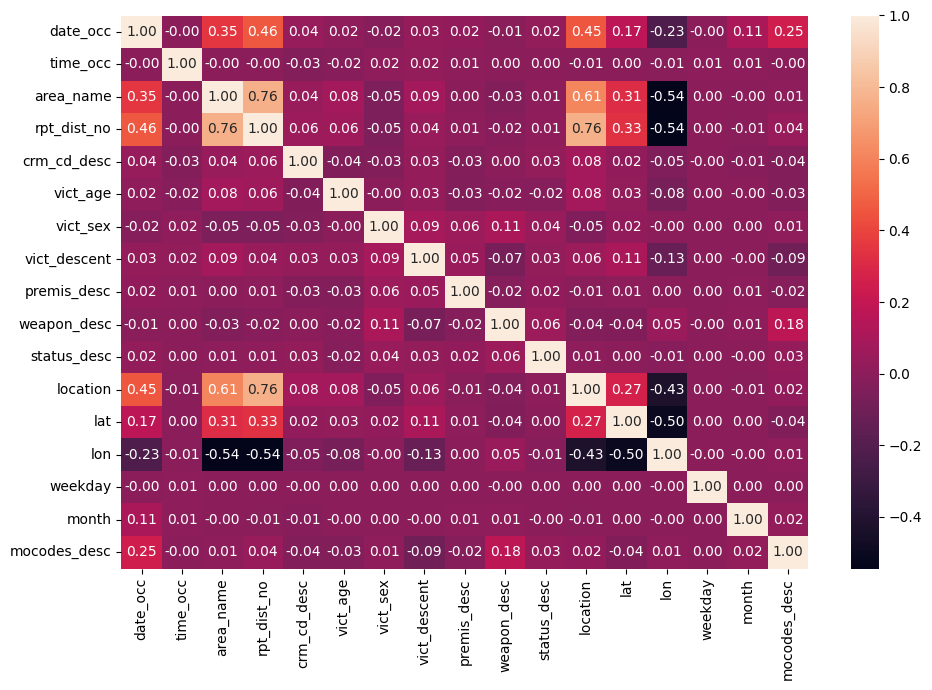

In [166]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [167]:
total_data.drop("rpt_dist_no", axis = 1, inplace = True)

In [168]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320504 entries, 0 to 320503
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date_occ      320504 non-null  datetime64[ns]
 1   time_occ      320504 non-null  int64         
 2   area_name     320504 non-null  int64         
 3   crm_cd_desc   320504 non-null  int64         
 4   vict_age      320504 non-null  int64         
 5   vict_sex      320504 non-null  int64         
 6   vict_descent  320504 non-null  int64         
 7   premis_desc   320504 non-null  int64         
 8   weapon_desc   320504 non-null  int64         
 9   status_desc   320504 non-null  int64         
 10  location      320504 non-null  int64         
 11  lat           320504 non-null  float64       
 12  lon           320504 non-null  float64       
 13  weekday       320504 non-null  int64         
 14  month         320504 non-null  int64         
 15  mocodes_desc  320

In [169]:
total_data.to_csv('../data/processed/final_data.csv',index=False)

In [172]:
luis_df=pd.read_csv("../data/processed/luis_data.csv")
luis_df.head()

,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc
0,2020-01-08,2230,0,0,36,0,0,0,0,0,0,34.0141,-118.2978,0,0,0
1,2020-01-01,330,1,0,25,1,1,1,1,1,1,34.0459,-118.2545,0,0,1
2,2020-01-01,1730,2,1,76,0,2,2,2,1,2,34.1685,-118.4019,0,0,2
3,2020-01-01,415,3,2,31,2,3,3,2,1,3,34.2198,-118.4468,0,0,3
4,2020-01-01,30,1,3,25,0,1,4,1,1,4,34.0452,-118.2534,0,0,4


In [175]:
total_data.head()

,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc
0,2020-01-08,2230,0,0,36,0,0,0,0,0,0,34.0141,-118.2978,0,0,0
1,2020-01-01,330,1,0,25,1,1,1,1,1,1,34.0459,-118.2545,0,0,1
2,2020-01-01,1730,2,1,76,0,2,2,2,1,2,34.1685,-118.4019,0,0,2
3,2020-01-01,415,3,2,31,2,3,3,2,1,3,34.2198,-118.4468,0,0,3
4,2020-01-01,30,1,3,25,0,1,4,1,1,4,34.0452,-118.2534,0,0,4


In [217]:
total_data.compare(luis_df)#.loc[1001]

date_occ             time_occ         area_name       crm_cd_desc  \
             self       other     self   other      self other        self   
111    2020-01-09  2020-01-06   2100.0    30.0       NaN   NaN         6.0   
112    2020-01-06  2020-01-05     30.0  1945.0       NaN   NaN        13.0   
113           NaT         NaN   1945.0  2120.0       NaN   NaN         2.0   
114           NaT         NaN   2120.0  1717.0       NaN   NaN        14.0   
115           NaT         NaN   1717.0   519.0       NaN   NaN        20.0   
...           ...         ...      ...     ...       ...   ...         ...   
320499        NaT         NaN      NaN     NaN       NaN   NaN         NaN   
320500        NaT         NaN      NaN     NaN       NaN   NaN        32.0   
320501        NaT         NaN      NaN     NaN       NaN   NaN         NaN   
320502        NaT         NaN      NaN     NaN       NaN   NaN        63.0   
320503        NaT         NaN      NaN     NaN       NaN   NaN         NaN   

             vict_age        ...      lat                lon            \
       other     self other  ...     self    other      self     other   
111     13.0     30.0  26.0  ...  34.0446  34.0409 -118.2490 -118.2574   
112      2.0     26.0  56.0  ...  34.0409  34.0401 -118.2574 -118.2668   
113     14.0     56.0  35.0  ...  34.0401  34.0460 -118.2668 -118.2509   
114     20.0     35.0  28.0  ...  34.0460  34.0503 -118.2509 -118.2504   
115     18.0     28.0  19.0  ...  34.0503  34.0563 -118.2504 -118.2374   
...      ...      ...   ...  ...      ...      ...       ...       ...   
320499   NaN      NaN   NaN  ...      NaN      NaN       NaN       NaN   
320500  33.0      NaN   NaN  ...      NaN      NaN       NaN       NaN   
320501   NaN      NaN   NaN  ...      NaN      NaN       NaN       NaN   
320502  57.0      NaN   NaN  ...      NaN      NaN       NaN       NaN   
320503   NaN      NaN   NaN  ...      NaN      NaN       NaN       NaN   

       weekday       month       mocodes_desc          
          self other  self other         self   other  
111        1.0   5.0   NaN   NaN         43.0    97.0  
112        5.0   3.0   NaN   NaN         97.0    98.0  
113        NaN   NaN   NaN   NaN         98.0    99.0  
114        NaN   NaN   NaN   NaN         99.0   100.0  
115        NaN   NaN   NaN   NaN        100.0   101.0  
...        ...   ...   ...   ...          ...     ...  
320499     NaN   NaN   NaN   NaN       3949.0  3913.0  
320500     NaN   NaN   NaN   NaN       1643.0  1641.0  
320501     NaN   NaN   NaN   NaN       3206.0  3170.0  
320502     NaN   NaN   NaN   NaN          NaN     NaN  
320503     NaN   NaN   NaN   NaN       1387.0  1388.0  

[207338 rows x 32 columns]

In [213]:
total_data['date_occ'].value_counts().loc['2020-01-09']

109

In [214]:
luis_df['date_occ'].value_counts().loc['2020-01-09']

109

In [223]:
total_data.loc[114]

date_occ        2020-01-05 00:00:00
time_occ                       2120
area_name                         1
crm_cd_desc                      14
vict_age                         35
vict_sex                          0
vict_descent                      2
premis_desc                       1
weapon_desc                       0
status_desc                       1
location                         87
lat                          34.046
lon                       -118.2509
weekday                           3
month                             0
mocodes_desc                     99
Name: 114, dtype: object

In [224]:
luis_df.loc[113]

date_occ        2020-01-05
time_occ              2120
area_name                1
crm_cd_desc             14
vict_age                35
vict_sex                 0
vict_descent             2
premis_desc              1
weapon_desc              0
status_desc              1
location                87
lat                 34.046
lon              -118.2509
weekday                  3
month                    0
mocodes_desc            99
Name: 113, dtype: object

In [226]:
total_data.loc[320503]

date_occ        2023-11-09 00:00:00
time_occ                       2300
area_name                         0
crm_cd_desc                      54
vict_age                         38
vict_sex                          1
vict_descent                      2
premis_desc                       0
weapon_desc                       2
status_desc                       1
location                       3169
lat                         34.0091
lon                       -118.3078
weekday                           1
month                             6
mocodes_desc                   1387
Name: 320503, dtype: object

In [228]:
indice_fila = luis_df[luis_df.isin(total_data.loc[320503]).all(axis=1)]#.index[0]
indice_fila

,date_occ,time_occ,area_name,crm_cd_desc,vict_age,vict_sex,vict_descent,premis_desc,weapon_desc,status_desc,location,lat,lon,weekday,month,mocodes_desc
